In [1]:
import sys
import subprocess
import pkg_resources
import statsmodels._version

if statsmodels._version.get_versions()['version'] != '0.11.1':
  !pip install --upgrade statsmodels

required = {'pmdarima'}
installed = {pkg.key for pkg in pkg_resources.working_set}
missing = required - installed

if missing:
    python = sys.executable
    subprocess.check_call([python, '-m', 'pip', 'install', *missing], stdout=subprocess.DEVNULL)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%cd "/content/drive/My Drive/Colab Notebooks/Time_Series_Projects/Data"

/content/drive/My Drive/Colab Notebooks/Time_Series_Projects/Data


In [3]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [40]:
df_original = pd.read_csv('RestaurantVisitors.csv',parse_dates=True,index_col = 'date')

In [41]:
df_original.index.freq = 'D'

In [42]:
df = df.dropna()

In [43]:
cols = [ 'rest1', 'rest2', 'rest3',  'rest4', 'total']
for col in cols:
  df[col] = df [col].astype(int)

In [44]:
df.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65,25,67,139,296
2016-01-02,Saturday,0,na,24,39,43,85,191
2016-01-03,Sunday,0,na,24,31,66,81,202
2016-01-04,Monday,0,na,23,18,32,32,105
2016-01-05,Tuesday,0,na,2,15,38,43,98


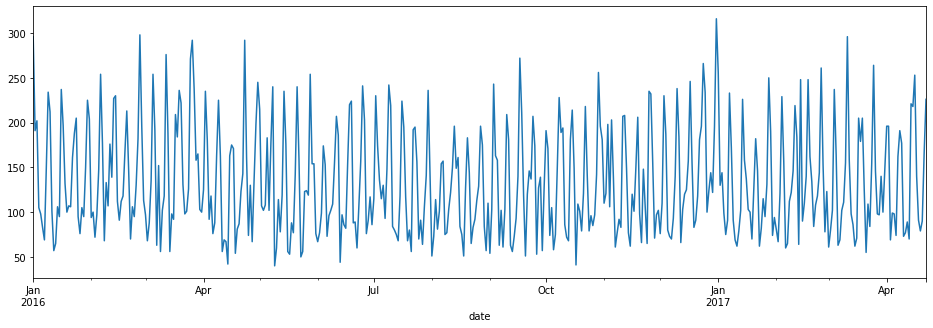

In [45]:
df['total'].plot(figsize=(16,5));

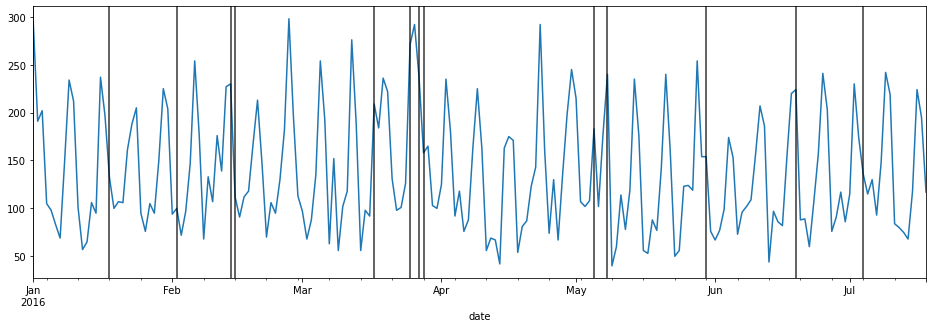

In [10]:
ax  = df['total'].iloc[:200].plot(figsize=(16,5));
holidays = df.query('holiday==1').index

for day in holidays:
  ax.axvline(x=day,color='k',alpha=0.8);


ETS Decomposition

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

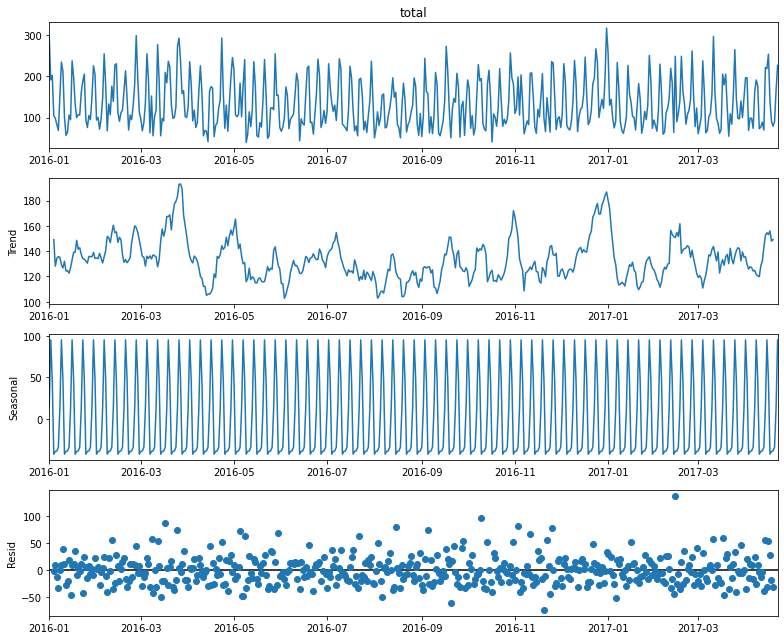

In [12]:
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9
seasonal_decompose(df['total'],model='add').plot();

Train Test Split

In [13]:
len(df)

478

In [14]:
train = df.iloc[:436]
test = df.iloc[436:]

In [15]:
from pmdarima import auto_arima

In [16]:
auto_arima_results = auto_arima(df['total'],seasonal=True,m=7,method='nm',maxiter=1000)

Performing stepwise search to minimize aic


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(2,0,2)x(1,0,1,7) [intercept=True]; AIC=4724.630, BIC=4757.986, Time=7.256 seconds
Fit ARIMA(0,0,0)x(0,0,0,7) [intercept=True]; AIC=5269.484, BIC=5277.823, Time=0.142 seconds
Fit ARIMA(1,0,0)x(1,0,0,7) [intercept=True]; AIC=4916.749, BIC=4933.428, Time=2.151 seconds
Fit ARIMA(0,0,1)x(0,0,1,7) [intercept=True]; AIC=5049.644, BIC=5066.322, Time=0.939 seconds
Fit ARIMA(0,0,0)x(0,0,0,7) [intercept=False]; AIC=6126.084, BIC=6130.254, Time=0.045 seconds
Fit ARIMA(2,0,2)x(0,0,1,7) [intercept=True]; AIC=5032.559, BIC=5061.746, Time=3.767 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(2,0,2)x(1,0,0,7) [intercept=True]; AIC=4885.410, BIC=4914.597, Time=6.718 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(2,0,2)x(2,0,1,7) [intercept=True]; AIC=4730.695, BIC=4768.222, Time=10.849 seconds
Near non-invertible roots for order (2, 0, 2)(2, 0, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.991)


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(2,0,2)x(1,0,2,7) [intercept=True]; AIC=4729.907, BIC=4767.433, Time=12.819 seconds
Near non-invertible roots for order (2, 0, 2)(1, 0, 2, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.992)
Fit ARIMA(2,0,2)x(0,0,0,7) [intercept=True]; AIC=5151.926, BIC=5176.944, Time=2.024 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(2,0,2)x(0,0,2,7) [intercept=True]; AIC=4966.437, BIC=4999.793, Time=12.554 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(2,0,2)x(2,0,0,7) [intercept=True]; AIC=4848.834, BIC=4882.191, Time=12.509 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(2,0,2)x(2,0,2,7) [intercept=True]; AIC=4768.186, BIC=4809.882, Time=12.858 seconds
Near non-invertible roots for order (2, 0, 2)(2, 0, 2, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.997)


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(1,0,2)x(1,0,1,7) [intercept=True]; AIC=4720.416, BIC=4749.604, Time=7.175 seconds
Near non-invertible roots for order (1, 0, 2)(1, 0, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(2,0,1)x(1,0,1,7) [intercept=True]; AIC=4735.681, BIC=4764.868, Time=6.716 seconds
Near non-invertible roots for order (2, 0, 1)(1, 0, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.996)


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(3,0,2)x(1,0,1,7) [intercept=True]; AIC=4743.627, BIC=4781.153, Time=7.143 seconds
Near non-invertible roots for order (3, 0, 2)(1, 0, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.997)


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(2,0,3)x(1,0,1,7) [intercept=True]; AIC=4732.515, BIC=4770.041, Time=8.032 seconds
Fit ARIMA(1,0,1)x(1,0,1,7) [intercept=True]; AIC=4724.654, BIC=4749.672, Time=5.840 seconds
Near non-invertible roots for order (1, 0, 1)(1, 0, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.991)


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(1,0,3)x(1,0,1,7) [intercept=True]; AIC=4726.739, BIC=4760.096, Time=8.196 seconds
Near non-invertible roots for order (1, 0, 3)(1, 0, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.994)


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(3,0,1)x(1,0,1,7) [intercept=True]; AIC=4771.230, BIC=4804.587, Time=7.294 seconds
Near non-invertible roots for order (3, 0, 1)(1, 0, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.997)
Fit ARIMA(3,0,3)x(1,0,1,7) [intercept=True]; AIC=4831.599, BIC=4873.295, Time=8.008 seconds
Total fit time: 143.076 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [17]:
print(auto_arima_results.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  478
Model:             SARIMAX(1, 0, 2)x(1, 0, [1], 7)   Log Likelihood               -2353.208
Date:                             Mon, 06 Jul 2020   AIC                           4720.416
Time:                                     02:11:10   BIC                           4749.604
Sample:                                          0   HQIC                          4731.891
                                             - 478                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0040      0.049      0.082      0.934      -0.091       0.099
ar.L1          0.3182      

In [18]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [19]:
model = SARIMAX(train['total'],order = (1,0,0),seasonal_order = (2,0,0,7),enforce_invertibility=False).fit()

In [20]:
model2 = SARIMAX(train['total'],order = (1,0,2),seasonal_order = (1,0,1,7),enforce_invertibility=False).fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [21]:
model.aic

4457.402658255681

In [22]:
model2.aic

4314.053918917745

In [23]:
start = len(train)
end = len(df)-1
predictions = model.predict(start = start,end = end).rename("SARIMA Model 1")
predictions2 = model2.predict(start = start,end = end).rename("SARIMA Model 2")

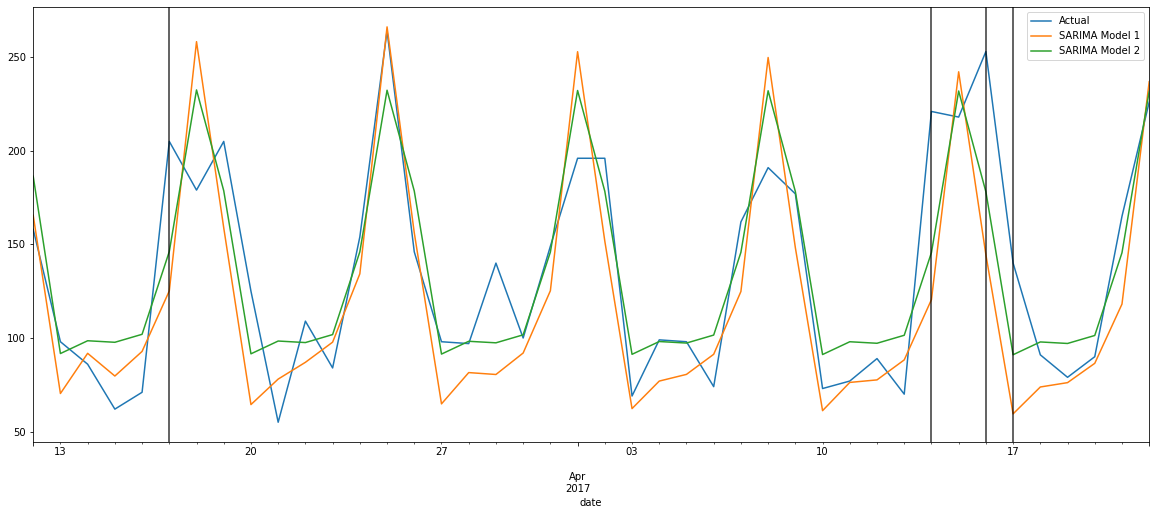

In [24]:
ax = test['total'].plot(legend = True,figsize=(20,8), label = 'Actual')
predictions.plot(legend = True)
predictions2.plot(legend = True)
for day in holidays:
  ax.axvline(x=day,color='k',alpha=0.8);

In [25]:
from statsmodels.tools.eval_measures import rmse

In [26]:
print(f"Model 1 RMSE: {rmse(test['total'],predictions):.0f}")
print(f"Model 2 RMSE: {rmse(test['total'],predictions2):.0f}")

Model 1 RMSE: 41
Model 2 RMSE: 31


In [27]:
test['total'].mean()

134.26190476190476

Adding Exogenous Variables

In [46]:
auto_arima_results_with_exogenous = auto_arima(df['total'],exogenous=df[['holiday']],seasonal=True,m=7)  #,method='nm',maxiter=1000)

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", Conve

In [29]:
print(auto_arima_results_with_exogenous.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  478
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 7)   Log Likelihood               -2275.712
Date:                           Mon, 06 Jul 2020   AIC                           4565.425
Time:                                   02:15:13   BIC                           4594.612
Sample:                               01-01-2016   HQIC                          4576.900
                                    - 04-22-2017                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0033      0.006      0.555      0.579      -0.008       0.015
holiday       66.1711      3.644     18.160

Train SARIMAX Model

In [31]:
model = SARIMAX(train['total'],exog = train[['holiday']],order = (1, 0, 1),seasonal_order = (1, 0, 1, 7)).fit()
print(model.summary())

                                     SARIMAX Results                                     
Dep. Variable:                             total   No. Observations:                  436
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 7)   Log Likelihood               -2086.287
Date:                           Mon, 06 Jul 2020   AIC                           4184.574
Time:                                   02:18:20   BIC                           4209.040
Sample:                               01-01-2016   HQIC                          4194.230
                                    - 03-11-2017                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday       63.4263      3.717     17.065      0.000      56.142      70.711
ar.L1          0.8594      0.070     12.365

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [32]:
prediction_with_exog = model.predict(start=len(train),end = len(df)-1,exog= test[['holiday']]).rename('Prediction with Exogenous')

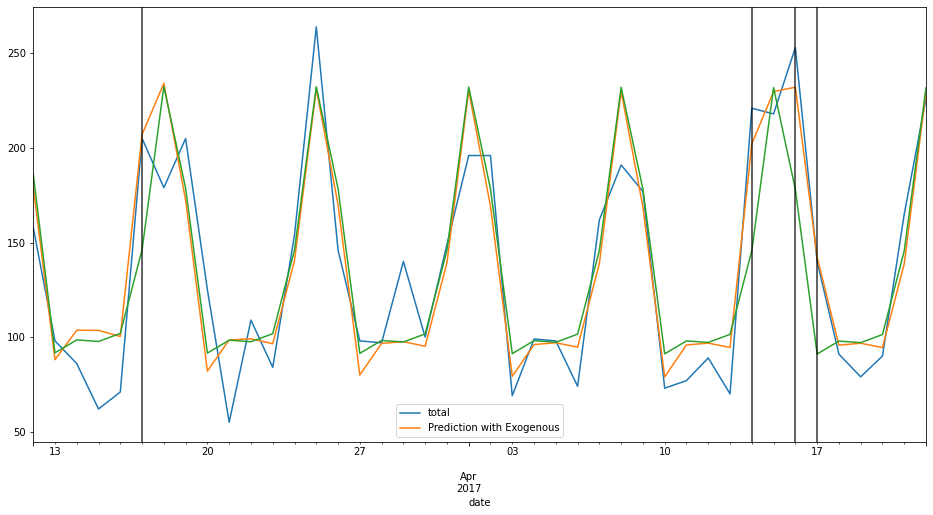

In [37]:
ax = test['total'].plot(figsize=(16,8),legend=True)
prediction_with_exog.plot(legend=True)
predictions2.plot()
for day in holidays:
  ax.axvline(x=day,color='k',alpha=0.8);

In [38]:
print(f"Model 1 RMSE: {rmse(test['total'],predictions):.0f}")
print(f"Model 2 RMSE: {rmse(test['total'],predictions2):.0f}")
print(f"Model 3 (with Exog) RMSE: {rmse(test['total'],prediction_with_exog):.0f}")

Model 1 RMSE: 41
Model 2 RMSE: 31
Model 3 (with Exog) RMSE: 24


Forecasting into unknown future

In [75]:
model = SARIMAX(df['total'],exog = df[['holiday']],order = (1, 0, 1),seasonal_order = (1, 0, 1, 7)).fit()
print(model.summary())

                                     SARIMAX Results                                     
Dep. Variable:                             total   No. Observations:                  478
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 7)   Log Likelihood               -2286.058
Date:                           Mon, 06 Jul 2020   AIC                           4584.117
Time:                                   02:38:34   BIC                           4609.135
Sample:                               01-01-2016   HQIC                          4593.953
                                    - 04-22-2017                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday       69.9296      3.987     17.537      0.000      62.114      77.745
ar.L1          0.9997      0.001   1133.823

In [76]:
df.tail(5)

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-04-18,Tuesday,0,na,30,30,13,18,91
2017-04-19,Wednesday,0,na,20,11,30,18,79
2017-04-20,Thursday,0,na,22,3,19,46,90
2017-04-21,Friday,0,na,38,53,36,38,165
2017-04-22,Saturday,0,na,97,20,50,59,226


In [77]:
df_original.iloc[len(df):].head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-04-23,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-24,Monday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-25,Tuesday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-26,Wednesday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-27,Thursday,0,na,NaN,NaN,NaN,NaN,NaN


In [127]:
future_forecast = model.predict(len(df),len(df_original)-1,exog = df_original[len(df):][['holiday']]).rename('Forecast')

In [128]:
all_holidays = df_original[df_original['holiday']==1].index

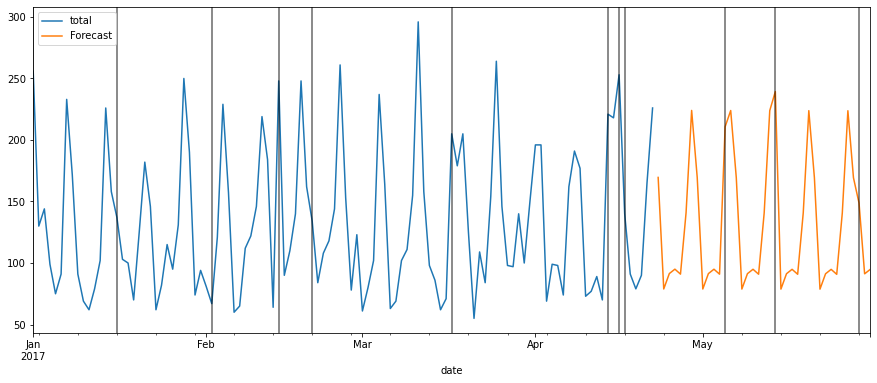

In [129]:

ax = df['total'].loc['01-01-2017':].plot(figsize=(15,6),legend=True)
future_forecast.plot(legend=True)
for day in all_holidays:
  ax.axvline(x = day,color='k',alpha=0.6)

date
2017-04-19     79
2017-04-20     90
2017-04-21    165
2017-04-22    226
Freq: D, Name: total, dtype: int64